# A data analysis on the evolution of covid and vaccination in Portugal

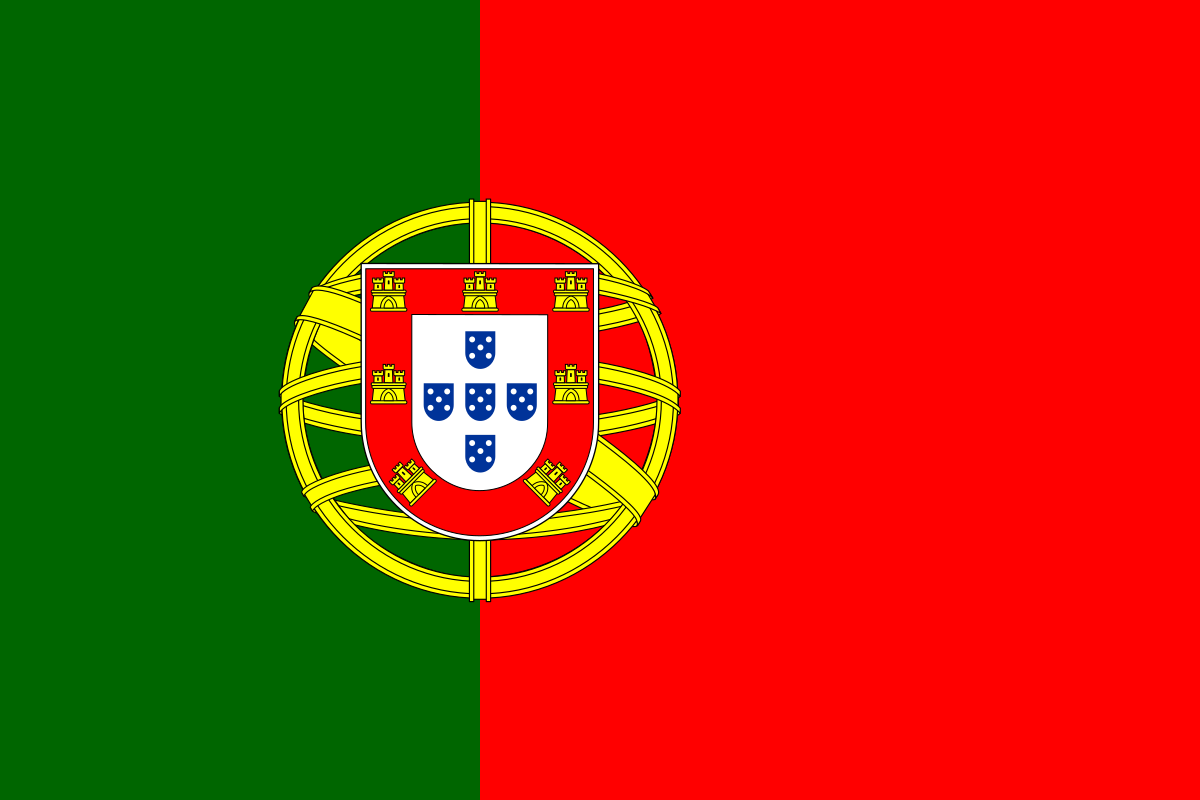

## SECTION 1 - CLEANING THE DATA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import style
import seaborn as sns
from scipy.stats import linregress as linreg
import statistics as stats
from scipy.signal import savgol_filter

In [2]:
df =pd.read_csv("/Users/andrelourenco/Desktop/CSV/Portugal_Covid_Study/owid-covid-data.csv")

In [3]:
vaccinations =pd.read_csv("/Users/andrelourenco/Desktop/CSV/Portugal_Covid_Study/vaccinations.csv")

In [4]:
biweekly_deaths =pd.read_csv("/Users/andrelourenco/Desktop/CSV/Portugal_Covid_Study/biweekly_deaths.csv")

In [5]:
biweekly_cases =pd.read_csv("/Users/andrelourenco/Desktop/CSV/Portugal_Covid_Study/biweekly-covid-cases-per-million-people.csv")

### Filling na values for the df DataFrame

In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum()

iso_code                                        0
continent                                   12712
location                                        0
date                                            0
total_cases                                  8959
                                            ...  
human_development_index                     44369
excess_mortality_cumulative_absolute       213569
excess_mortality_cumulative                213569
excess_mortality                           213522
excess_mortality_cumulative_per_million    213569
Length: 67, dtype: int64

In [8]:
df.fillna(0, inplace = True)

In [9]:
df['continent'] = df['continent'].fillna("No info")

In [10]:
df.isna().sum().sum()

0

In [11]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


### Filling na values for the biweekly_cases DataFrame

In [12]:
biweekly_cases.isna().sum()

Entity                                   0
Code                                 11598
Day                                      0
Biweekly cases per million people        0
dtype: int64

In [13]:
biweekly_cases.Code = biweekly_cases.Code.fillna("No info")

In [14]:
biweekly_cases.isna().sum()

Entity                               0
Code                                 0
Day                                  0
Biweekly cases per million people    0
dtype: int64

### Filling na values for the biweekly_deaths DataFrame

In [15]:
biweekly_deaths.isna().sum()

date                   0
World                 12
Afghanistan           73
Africa                34
Albania               61
                    ... 
Vietnam              204
Wallis and Futuna    436
Yemen                111
Zambia                83
Zimbabwe              73
Length: 232, dtype: int64

In [16]:
biweekly_deaths = biweekly_deaths.fillna(0)

### Filling na values for the vaccination DataFrame

In [17]:
vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [18]:
vaccinations.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     66437
people_vaccinated                      69242
people_fully_vaccinated                71935
total_boosters                         96315
daily_vaccinations_raw                 77403
daily_vaccinations                       810
total_vaccinations_per_hundred         66437
people_vaccinated_per_hundred          69242
people_fully_vaccinated_per_hundred    71935
total_boosters_per_hundred             96315
daily_vaccinations_per_million           810
daily_people_vaccinated                 1392
daily_people_vaccinated_per_hundred     1392
dtype: int64

In [19]:
#vaccinations.fillna(0,inplace = True)

### Transform the day column into pandas date time format

In [20]:
biweekly_deaths.head()

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
biweekly_deaths["date"] = pd.to_datetime(biweekly_deaths["date"])

### Transform the day column into pandas date time format

In [22]:
biweekly_cases["Day"] = pd.to_datetime(biweekly_cases["Day"])

In [23]:
biweekly_cases.dtypes

Entity                                       object
Code                                         object
Day                                  datetime64[ns]
Biweekly cases per million people           float64
dtype: object

### Transform the date column into pandas date time format

In [24]:
df["date"] = pd.to_datetime(df["date"])

In [25]:
df["year"] = df["date"].dt.year

### Transform the date column into pandas date time format

In [26]:
vaccinations.date = pd.to_datetime(vaccinations.date)

In [27]:
vaccinations.dtypes

location                                       object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                            float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
total_boosters                                float64
daily_vaccinations_raw                        float64
daily_vaccinations                            float64
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
total_boosters_per_hundred                    float64
daily_vaccinations_per_million                float64
daily_people_vaccinated                       float64
daily_people_vaccinated_per_hundred           float64
dtype: object

### Create a new DataFrame with just the data of Portugal

In [28]:
prt = df.loc[df["location"] == "Portugal"]

In [29]:
prt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
160405,PRT,Europe,Portugal,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,-1943.6,-7.87,-8.18,-188.880519,2020
160406,PRT,Europe,Portugal,2020-03-02,2.0,2.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160407,PRT,Europe,Portugal,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160408,PRT,Europe,Portugal,2020-03-04,5.0,3.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160409,PRT,Europe,Portugal,2020-03-05,8.0,3.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020


#### We replace  all missing values with 0, and in the continent column we replace the missing values with the string "No info"

## SECTION 2 - DATA ANALYSIS

## 1. Confirmed Cases

#### What is the daily number of confirmed cases?
#### Daily confirmed cases: how do they compare to other countries?
#### What is the cumulative number of confirmed cases?
#### Cumulative confirmed cases: how do they compare to other countries?
#### Biweekly cases: where are confirmed cases increasing or falling?
#### Global cases in comparison: how are cases changing across the world?

#### 1.1 What is the daily number of confirmed cases?

In [30]:
prt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
160405,PRT,Europe,Portugal,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,-1943.6,-7.87,-8.18,-188.880519,2020
160406,PRT,Europe,Portugal,2020-03-02,2.0,2.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160407,PRT,Europe,Portugal,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160408,PRT,Europe,Portugal,2020-03-04,5.0,3.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160409,PRT,Europe,Portugal,2020-03-05,8.0,3.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020


In [31]:
prt.groupby(["year","date"])["new_cases"].sum()

year  date      
2020  2020-03-01       0.0
      2020-03-02       2.0
      2020-03-03       0.0
      2020-03-04       3.0
      2020-03-05       3.0
                     ...  
2022  2022-09-29    5693.0
      2022-09-30    2901.0
      2022-10-01       0.0
      2022-10-02       0.0
      2022-10-03    4586.0
Name: new_cases, Length: 947, dtype: float64

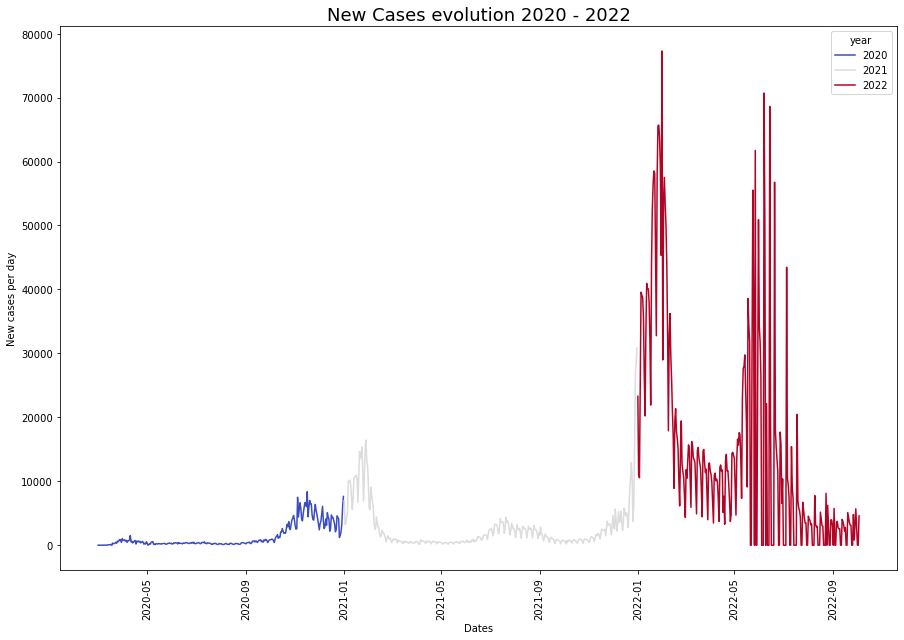

In [32]:
plt.figure(figsize=(15,10))

sns.lineplot(x = prt.groupby(["year","date"])["new_cases"].sum().index.get_level_values(1),
             hue = prt.groupby(["year","date"])["new_cases"].sum().index.get_level_values(0),
             y = prt.groupby(["year","date"])["new_cases"].sum().values,
             palette = "coolwarm")
 
plt.xticks(rotation="vertical")
plt.xlabel("Dates")
plt.ylabel("New cases per day")
plt.title("New Cases evolution 2020 - 2022", fontsize=18)



plt.show()

#### 1.2 Daily confirmed cases: how do they compare to other countries?

In [33]:
df.loc[df.location=="European Union"].groupby(["year","date"])["new_cases_per_million"].sum()

year  date      
2020  2020-01-23      0.000
      2020-01-24      0.004
      2020-01-25      0.002
      2020-01-26      0.000
      2020-01-27      0.002
                     ...   
2022  2022-09-29    548.464
      2022-09-30    473.952
      2022-10-01    126.233
      2022-10-02     94.704
      2022-10-03    315.480
Name: new_cases_per_million, Length: 985, dtype: float64

In [34]:
df.loc[df.location=="Portugal"].groupby(["year","date"])["new_cases_per_million"].sum()

year  date      
2020  2020-03-01      0.000
      2020-03-02      0.194
      2020-03-03      0.000
      2020-03-04      0.292
      2020-03-05      0.292
                     ...   
2022  2022-09-29    553.250
      2022-09-30    281.921
      2022-10-01      0.000
      2022-10-02      0.000
      2022-10-03    445.671
Name: new_cases_per_million, Length: 947, dtype: float64

In [35]:
df.loc[df.location=="United States"].groupby(["year","date"])["new_cases_per_million"].sum()

year  date      
2020  2020-01-22      0.000
      2020-01-23      0.000
      2020-01-24      0.003
      2020-01-25      0.000
      2020-01-26      0.009
                     ...   
2022  2022-09-29    247.417
      2022-09-30    109.953
      2022-10-01     22.241
      2022-10-02     15.852
      2022-10-03    121.191
Name: new_cases_per_million, Length: 986, dtype: float64

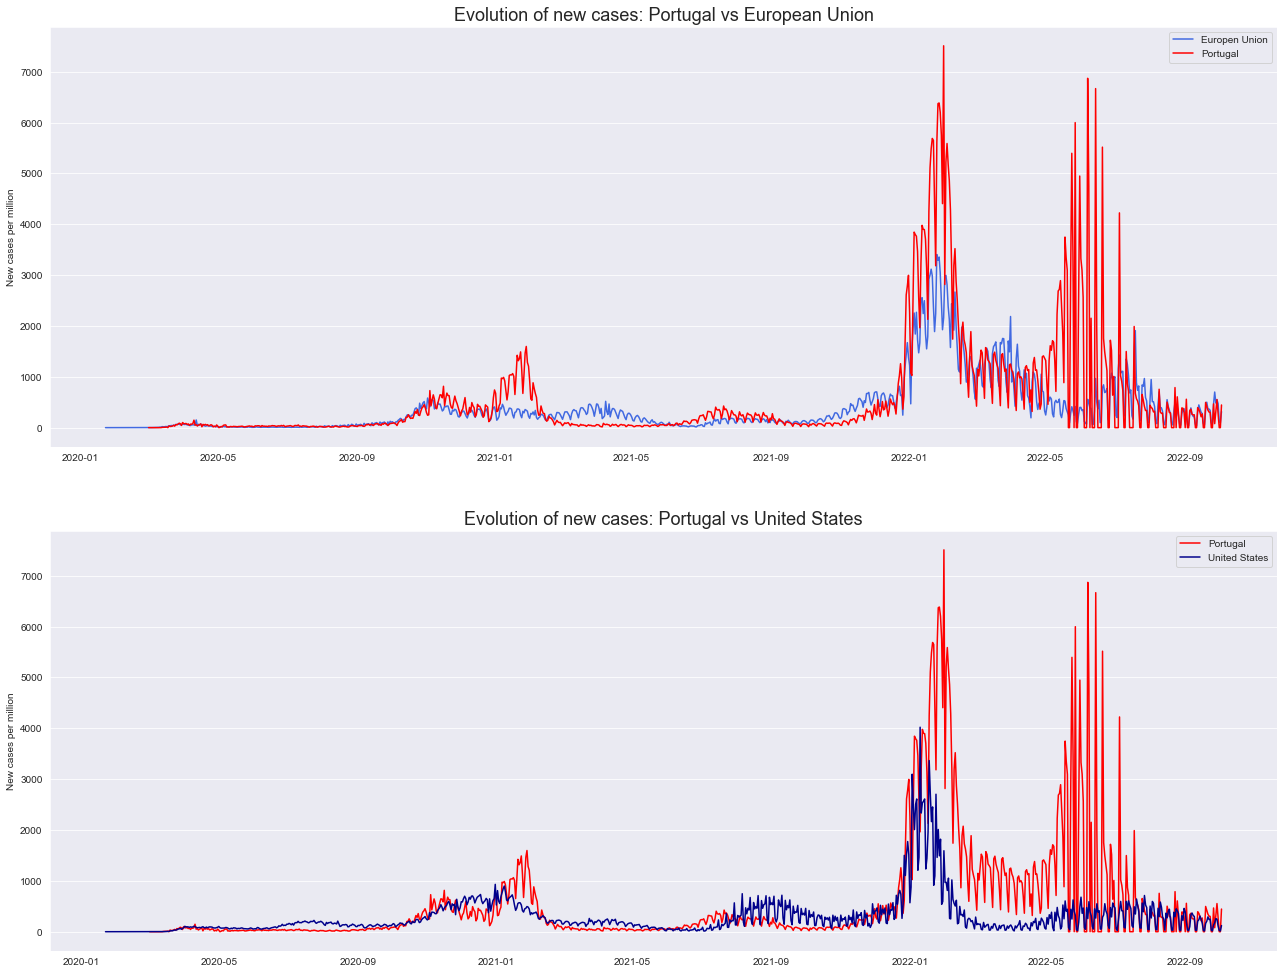

In [36]:
sns.set_style("dark")
fig, axes = plt.subplots(2, 1, figsize=(22,17), sharey=True)


### Europen Union VS Portugal 
sns.lineplot(ax=axes[0],
            x = df.loc[df.location=="European Union"].groupby(["year","date"])["new_cases_per_million"].sum().index.get_level_values(1),
            y = df.loc[df.location=="European Union"].groupby(["year","date"])["new_cases_per_million"].sum().values,
            color = "royalblue",
            label = "Europen Union")
sns.lineplot(ax=axes[0],
            x = df.loc[df.location=="Portugal"].groupby(["year","date"])["new_cases_per_million"].sum().index.get_level_values(1),
            y = df.loc[df.location=="Portugal"].groupby(["year","date"])["new_cases_per_million"].sum().values,
            color = "red",
            label = "Portugal")
axes[0].set_title("Evolution of new cases: Portugal vs European Union", fontsize = 18)
axes[0].set_ylabel("New cases per million")
axes[0].grid(axis="y")
axes[0].set_xlabel("")


### United States VS Portugal 
sns.lineplot(ax=axes[1],
            x = df.loc[df.location=="Portugal"].groupby(["year","date"])["new_cases_per_million"].sum().index.get_level_values(1),
            y = df.loc[df.location=="Portugal"].groupby(["year","date"])["new_cases_per_million"].sum().values,
            color = "red",
            label = "Portugal")
sns.lineplot(ax=axes[1],
            x = df.loc[df.location=="United States"].groupby(["year","date"])["new_cases_per_million"].sum().index.get_level_values(1),
            y = df.loc[df.location=="United States"].groupby(["year","date"])["new_cases_per_million"].sum().values,
            color = "darkblue",
            label = "United States")
axes[1].set_title("Evolution of new cases: Portugal vs United States",fontsize = 18)
axes[1].set_ylabel("New cases per million")
axes[1].grid(axis="y")
axes[1].set_xlabel("")






plt.show()

#### 1.3 What is the cumulative number of confirmed cases?


In [37]:
prt.groupby(["year","date"])["total_cases"].sum()

year  date      
2020  2020-03-01          0.0
      2020-03-02          2.0
      2020-03-03          2.0
      2020-03-04          5.0
      2020-03-05          8.0
                      ...    
2022  2022-09-29    5490639.0
      2022-09-30    5493540.0
      2022-10-01    5493540.0
      2022-10-02    5493540.0
      2022-10-03    5498126.0
Name: total_cases, Length: 947, dtype: float64

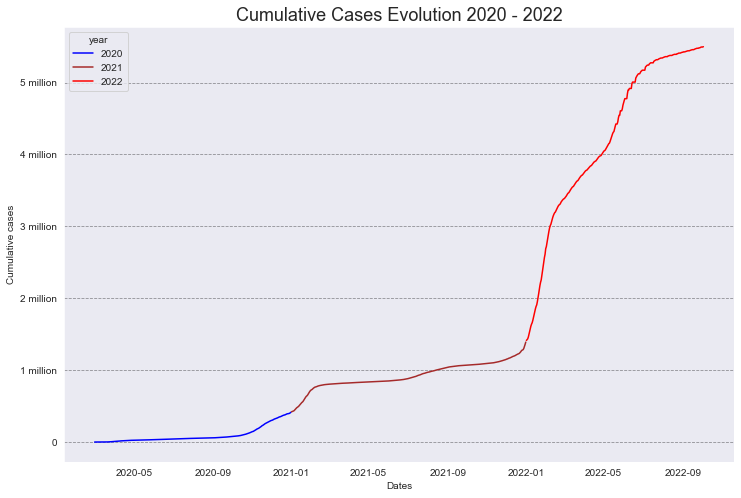

In [38]:
sns.set_style("dark")
plt.figure(figsize=(12,8))
color = ["blue","brown","red"]

ax = sns.lineplot(x = prt.groupby(["year","date"])["total_cases"].sum().index.get_level_values(1),
             hue = prt.groupby(["year","date"])["total_cases"].sum().index.get_level_values(0),
             y = prt.groupby(["year","date"])["total_cases"].sum().values,
             palette = color)

## y
plt.yticks(np.arange(0,5000001,1000000),["0",'1 million', '2 million', '3 million','4 million','5 million'])
plt.ylabel("Cumulative cases")

## x
plt.xlabel("Dates")

plt.title("Cumulative Cases Evolution 2020 - 2022", fontsize=18)
ax.grid(axis="y", color = "black", alpha = 0.4, linestyle ="--")

plt.show()

#### 1.4 Cumulative confirmed cases: how do they compare to other countries?

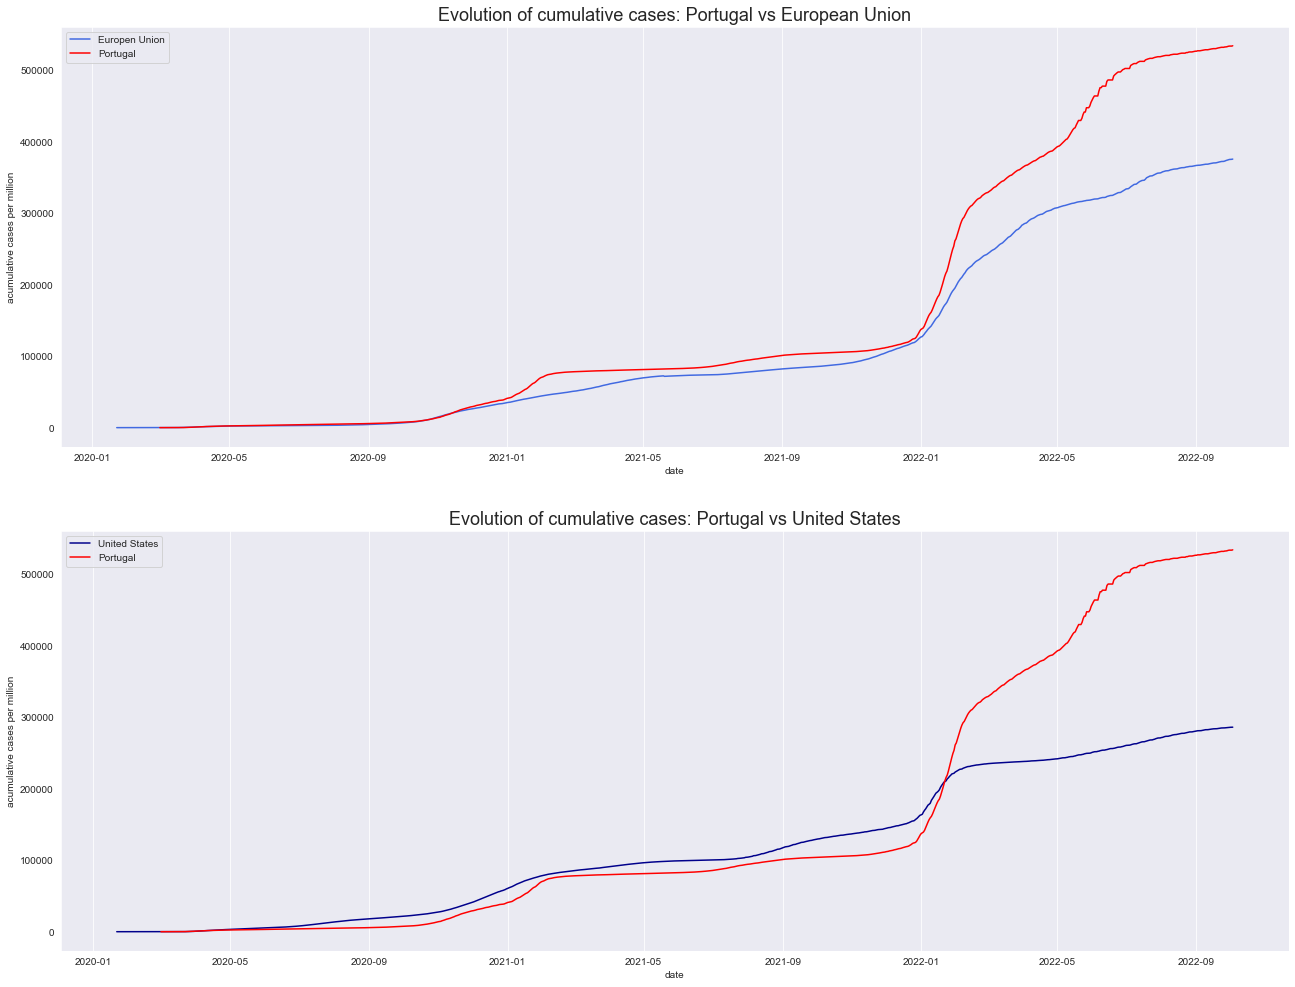

In [39]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(22,17), sharey=True)

### Europen Union VS Portugal 
sns.lineplot(ax=axes[0],
            x = df.loc[df.location=="European Union"].date,
            y = df.loc[df.location=="European Union"].total_cases_per_million,
            color = "royalblue",
            label = "Europen Union")
sns.lineplot(ax=axes[0],
            x = prt.date,
            y = prt.total_cases_per_million,
            color = "red",
            label = "Portugal")
axes[0].set_title("Evolution of cumulative cases: Portugal vs European Union", fontsize = 18)
axes[0].set_ylabel("acumulative cases per million")
axes[0].grid(axis="y")


### Europen Union VS Portugal 
sns.lineplot(ax=axes[1],
            x = df.loc[df.location=="United States"].date,
            y = df.loc[df.location=="United States"].total_cases_per_million,
            color = "darkblue",
            label = "United States")
sns.lineplot(ax=axes[1],
            x = prt.date,
            y = prt.total_cases_per_million,
            color = "red",
            label = "Portugal")
axes[1].set_title("Evolution of cumulative cases: Portugal vs United States", fontsize = 18)
axes[1].set_ylabel("acumulative cases per million")
axes[1].grid(axis="y")


#### 1.5 Biweekly cases: where are confirmed cases increasing or falling?

In [40]:
biweekly_cases.head()

,Entity,Code,Day,Biweekly cases per million people
0,Afghanistan,AFG,2020-03-07,0.200
1,Afghanistan,AFG,2020-03-08,0.200
2,Afghanistan,AFG,2020-03-09,0.075
3,Afghanistan,AFG,2020-03-10,0.075
4,Afghanistan,AFG,2020-03-11,0.150


In [41]:
prt_biweekly_cases = biweekly_cases.loc[biweekly_cases.Code == "PRT"]

In [42]:
prt_biweekly_cases

,Entity,Code,Day,Biweekly cases per million people
151770,Portugal,PRT,2020-03-14,16.424
151771,Portugal,PRT,2020-03-15,23.809
151772,Portugal,PRT,2020-03-16,31.972
151773,Portugal,PRT,2020-03-17,43.343
151774,Portugal,PRT,2020-03-18,43.051
...,...,...,...,...
152698,Portugal,PRT,2022-09-29,3560.509
152699,Portugal,PRT,2022-09-30,3572.559
152700,Portugal,PRT,2022-10-01,3572.559
152701,Portugal,PRT,2022-10-02,3572.559


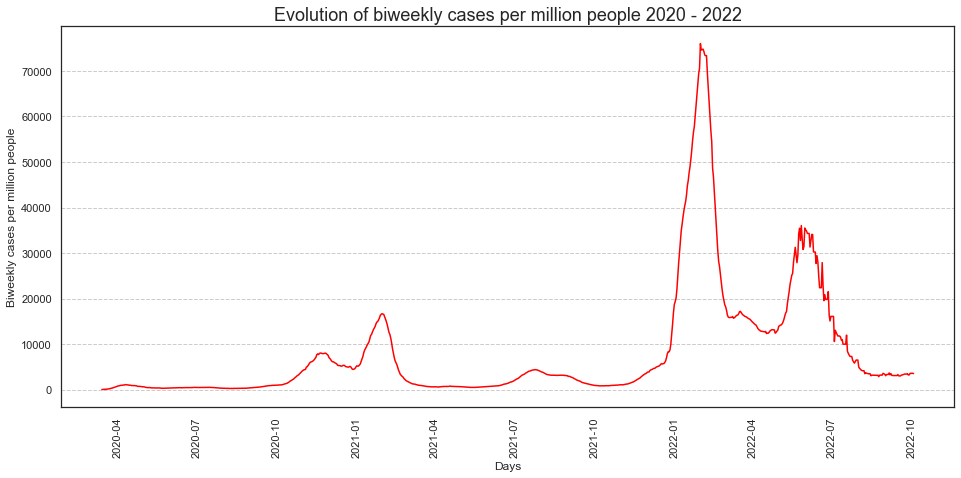

In [43]:
sns.set_context("notebook")
sns.set_style("white")
plt.figure(figsize=(16,7))
sns.lineplot(x = prt_biweekly_cases.Day,
             y = prt_biweekly_cases["Biweekly cases per million people"],
             color = "red")

plt.xlabel("Days")
plt.title("Evolution of biweekly cases per million people 2020 - 2022", fontsize = 18)

plt.xticks(rotation=90)
plt.grid(axis="y",linestyle="--")
plt.show()

#### 5. Biweekly change in confirmed covid 19 cases

In [44]:
biweekly_cases["Percentage changes(%)"] = biweekly_cases["Biweekly cases per million people"].pct_change()
prt_biweekly_cases = biweekly_cases.loc[biweekly_cases.Code == "PRT"]
prt_biweekly_cases["Percentage changes(%)"] = (prt_biweekly_cases["Percentage changes(%)"]) * 100
prt_biweekly_cases.head()

/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/2866404371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt_biweekly_cases["Percentage changes(%)"] = (prt_biweekly_cases["Percentage changes(%)"]) * 100


,Entity,Code,Day,Biweekly cases per million people,Percentage changes(%)
151770,Portugal,PRT,2020-03-14,16.424,-98.796683
151771,Portugal,PRT,2020-03-15,23.809,44.964686
151772,Portugal,PRT,2020-03-16,31.972,34.285354
151773,Portugal,PRT,2020-03-17,43.343,35.565495
151774,Portugal,PRT,2020-03-18,43.051,-0.673696


In [45]:
prt_biweekly_cases['Percentage changes(%)'][151770] = 0

/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/494055145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt_biweekly_cases['Percentage changes(%)'][151770] = 0


In [46]:
prt_biweekly_cases

,Entity,Code,Day,Biweekly cases per million people,Percentage changes(%)
151770,Portugal,PRT,2020-03-14,16.424,0.000000
151771,Portugal,PRT,2020-03-15,23.809,44.964686
151772,Portugal,PRT,2020-03-16,31.972,34.285354
151773,Portugal,PRT,2020-03-17,43.343,35.565495
151774,Portugal,PRT,2020-03-18,43.051,-0.673696
...,...,...,...,...,...
152698,Portugal,PRT,2022-09-29,3560.509,10.528543
152699,Portugal,PRT,2022-09-30,3572.559,0.338435
152700,Portugal,PRT,2022-10-01,3572.559,0.000000
152701,Portugal,PRT,2022-10-02,3572.559,0.000000


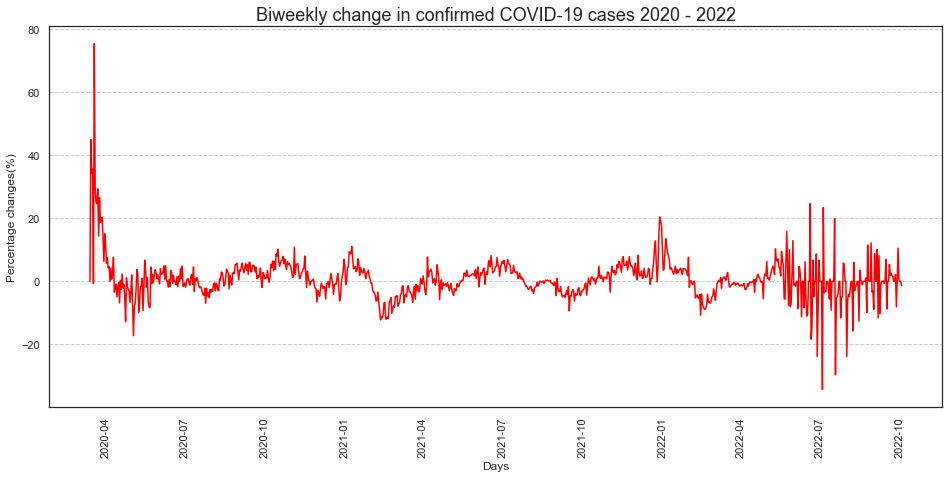

In [47]:
sns.set_context("notebook")
sns.set_style("white")
plt.figure(figsize=(16,7))
sns.lineplot(x = prt_biweekly_cases.Day,
             y = prt_biweekly_cases["Percentage changes(%)"],
             color = "red")

plt.xlabel("Days")
plt.title("Biweekly change in confirmed COVID-19 cases 2020 - 2022", fontsize = 18)

plt.xticks(rotation=90)
plt.grid(axis="y",linestyle="--")
plt.show()



## 2. Confirmed Deaths

#### 1. What is the daily number of confirmed deaths?
#### 2. Daily confirmed deaths: how do they compare to other countries?
#### 3. What is the cumulative number of confirmed deaths?
#### 4. Cumulative confirmed deaths: how do they compare to other countries?
#### 5. Biweekly deaths: where are confirmed deaths increasing or falling?
#### 6. Global deaths in comparison: how are deaths changing across the world?

#### 1. What is the daily number of confirmed deaths?

In [48]:
prt.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
161347,PRT,Europe,Portugal,2022-09-29,5490639.0,5693.0,2526.000,25024.0,7.0,5.714,...,30.0,0.0,3.39,82.05,0.864,0.0,0.0,0.0,0.0,2022
161348,PRT,Europe,Portugal,2022-09-30,5493540.0,2901.0,2497.286,25031.0,7.0,5.714,...,30.0,0.0,3.39,82.05,0.864,0.0,0.0,0.0,0.0,2022
161349,PRT,Europe,Portugal,2022-10-01,5493540.0,0.0,2497.286,25031.0,0.0,5.714,...,30.0,0.0,3.39,82.05,0.864,0.0,0.0,0.0,0.0,2022
161350,PRT,Europe,Portugal,2022-10-02,5493540.0,0.0,2497.286,25031.0,0.0,5.714,...,30.0,0.0,3.39,82.05,0.864,0.0,0.0,0.0,0.0,2022
161351,PRT,Europe,Portugal,2022-10-03,5498126.0,4586.0,2466.000,25058.0,27.0,7.143,...,30.0,0.0,3.39,82.05,0.864,0.0,0.0,0.0,0.0,2022


In [49]:
prt.groupby(["year","date"])["new_deaths"].sum()

year  date      
2020  2020-03-01     0.0
      2020-03-02     0.0
      2020-03-03     0.0
      2020-03-04     0.0
      2020-03-05     0.0
                    ... 
2022  2022-09-29     7.0
      2022-09-30     7.0
      2022-10-01     0.0
      2022-10-02     0.0
      2022-10-03    27.0
Name: new_deaths, Length: 947, dtype: float64

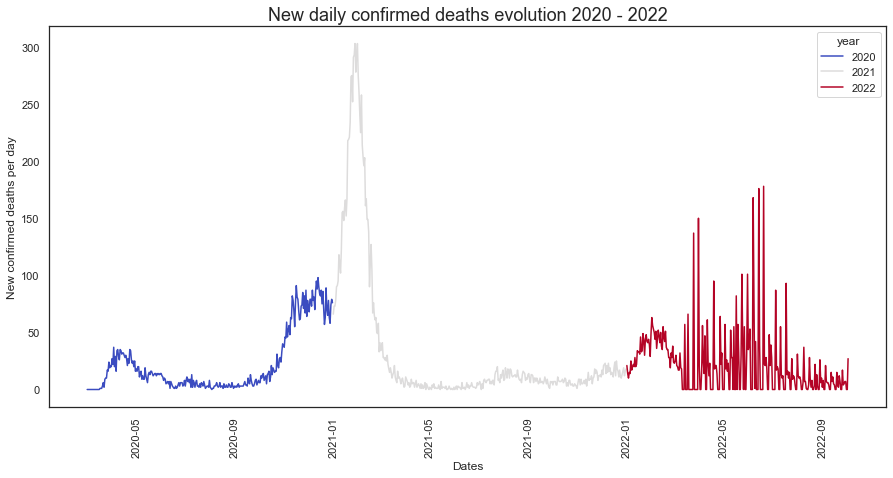

In [50]:
plt.figure(figsize=(15,7))

sns.lineplot(x = prt.groupby(["year","date"])["new_deaths"].sum().index.get_level_values(1),
             hue = prt.groupby(["year","date"])["new_deaths"].sum().index.get_level_values(0),
             y = prt.groupby(["year","date"])["new_deaths"].sum().values,
             palette = "coolwarm")

plt.xticks(rotation="vertical")
plt.xlabel("Dates")
plt.ylabel("New confirmed deaths per day")
plt.title("New daily confirmed deaths evolution 2020 - 2022", fontsize=18)


plt.show()

#### 2. Daily confirmed deaths: how do they compare to other countries?

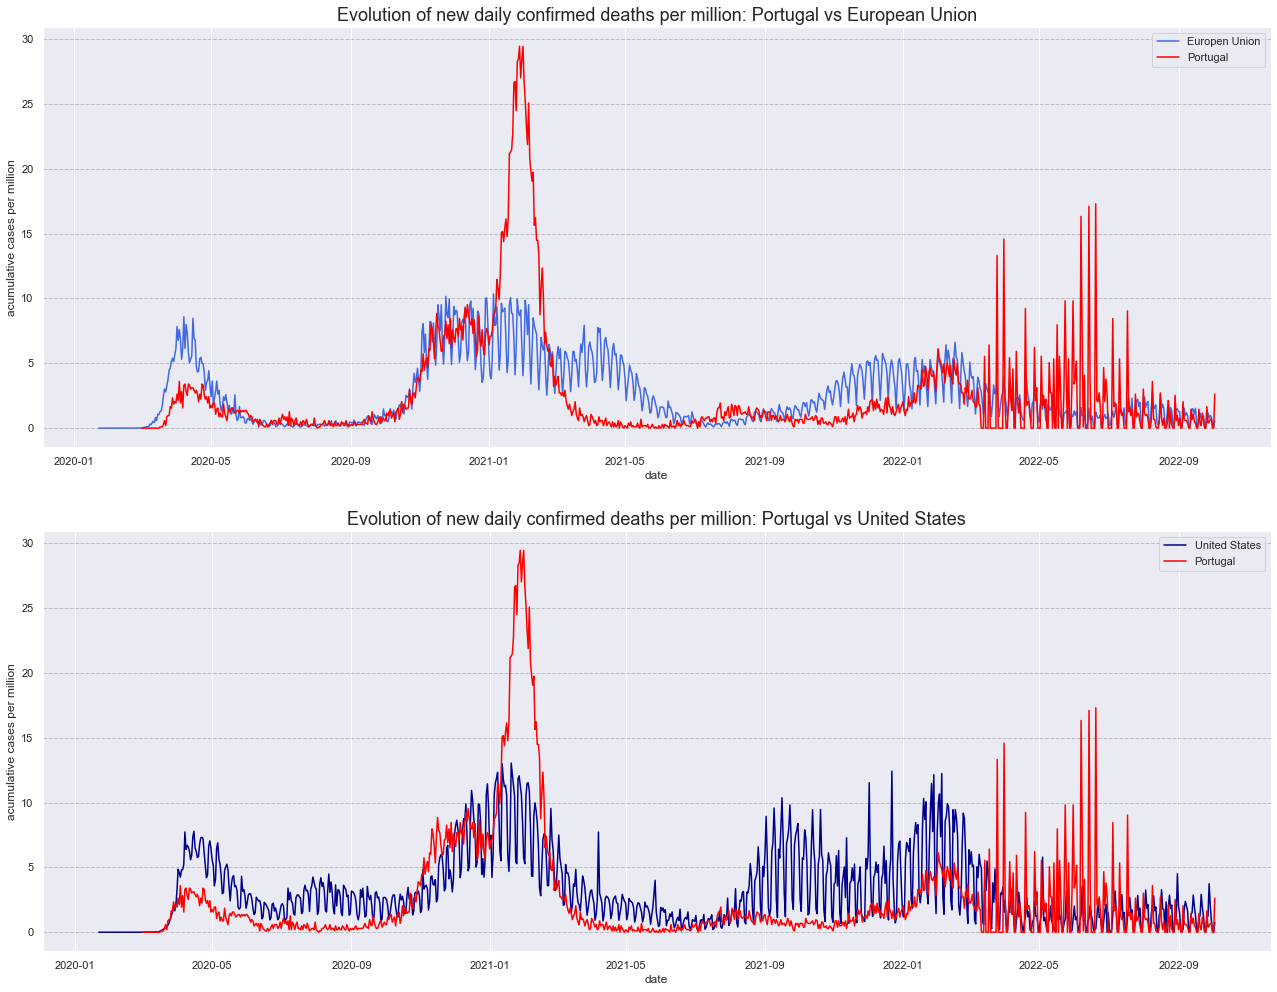

In [51]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(22,17), sharey=True)

### Portugal VS European Union
sns.lineplot(ax=axes[0],
            x = df.loc[df.location=="European Union"].date,
            y = df.loc[df.location=="European Union"].new_deaths_per_million,
            color = "royalblue",
            label = "Europen Union")
sns.lineplot(ax=axes[0],
            x = prt.date,
            y = prt.new_deaths_per_million,
            color = "red",
            label = "Portugal")
axes[0].set_title("Evolution of new daily confirmed deaths per million: Portugal vs European Union", fontsize = 18)
axes[0].set_ylabel("acumulative cases per million")
axes[0].grid(axis="y", color = "black", linestyle="--", alpha = 0.2)


### Portugal VS USA
sns.lineplot(ax=axes[1],
            x = df.loc[df.location=="United States"].date,
            y = df.loc[df.location=="United States"].new_deaths_per_million,
            color = "darkblue",
            label = "United States")
sns.lineplot(ax=axes[1],
            x = prt.date,
            y = prt.new_deaths_per_million,
            color = "red",
            label = "Portugal")
axes[1].set_title("Evolution of new daily confirmed deaths per million: Portugal vs United States", fontsize = 18)
axes[1].set_ylabel("acumulative cases per million")
axes[1].grid(axis="y", color = "black", linestyle="--", alpha = 0.2)



#### 3. What is the cumulative number of confirmed deaths?

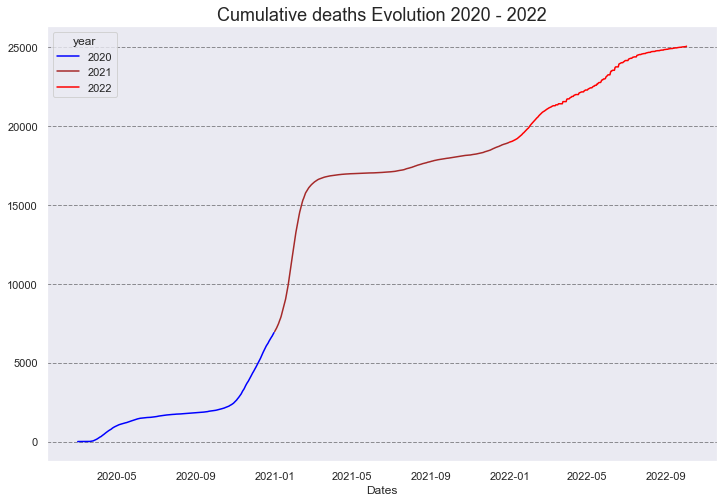

In [52]:
sns.set_style("dark")
plt.figure(figsize=(12,8))
color = ["blue","brown","red"]

ax = sns.lineplot(x = prt.groupby(["year","date"])["total_deaths"].sum().index.get_level_values(1),
             hue = prt.groupby(["year","date"])["total_deaths"].sum().index.get_level_values(0),
             y = prt.groupby(["year","date"])["total_deaths"].sum().values,
             palette = color)

## x
plt.xlabel("Dates")

plt.title("Cumulative deaths Evolution 2020 - 2022", fontsize=18)
ax.grid(axis="y", color = "black", alpha = 0.4, linestyle ="--")

plt.show()

#### 4. Cumulative confirmed deaths: how do they compare to other countries?

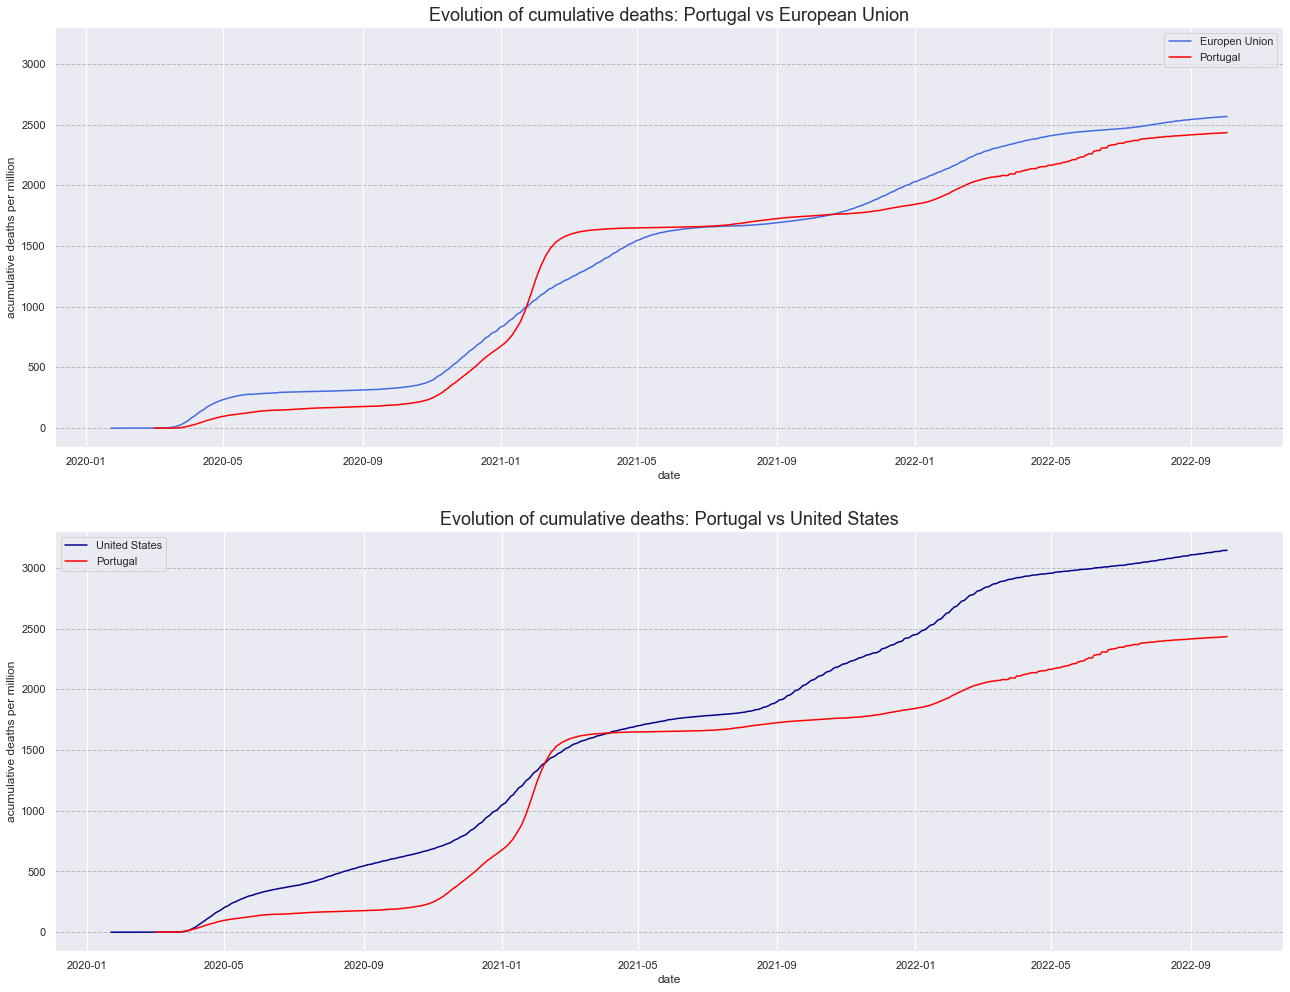

In [53]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(22,17), sharey=True)

### Portugal VS European Union
sns.lineplot(ax=axes[0],
            x = df.loc[df.location=="European Union"].date,
            y = df.loc[df.location=="European Union"].total_deaths_per_million,
            color = "royalblue",
            label = "Europen Union")
sns.lineplot(ax=axes[0],
            x = prt.date,
            y = prt.total_deaths_per_million,
            color = "red",
            label = "Portugal")
axes[0].set_title("Evolution of cumulative deaths: Portugal vs European Union", fontsize = 18)
axes[0].set_ylabel("acumulative deaths per million")
axes[0].grid(axis="y", color = "black", linestyle="--", alpha = 0.2)


### Portugal VS USA
sns.lineplot(ax=axes[1],
            x = df.loc[df.location=="United States"].date,
            y = df.loc[df.location=="United States"].total_deaths_per_million,
            color = "darkblue",
            label = "United States")
sns.lineplot(ax=axes[1],
            x = prt.date,
            y = prt.total_deaths_per_million,
            color = "red",
            label = "Portugal")
axes[1].set_title("Evolution of cumulative deaths: Portugal vs United States", fontsize = 18)
axes[1].set_ylabel("acumulative deaths per million")
axes[1].grid(axis="y", color = "black", linestyle="--", alpha = 0.2)

#### 5. Biweekly deaths: where are confirmed deaths increasing or falling?

In [54]:
biweekly_deaths.head()

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
prt_biweekly_deaths = biweekly_deaths.groupby("date")["Portugal"].sum()
prt_biweekly_deaths

date
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
              ... 
2022-09-29    77.0
2022-09-30    80.0
2022-10-01    80.0
2022-10-02    80.0
2022-10-03    92.0
Name: Portugal, Length: 986, dtype: float64

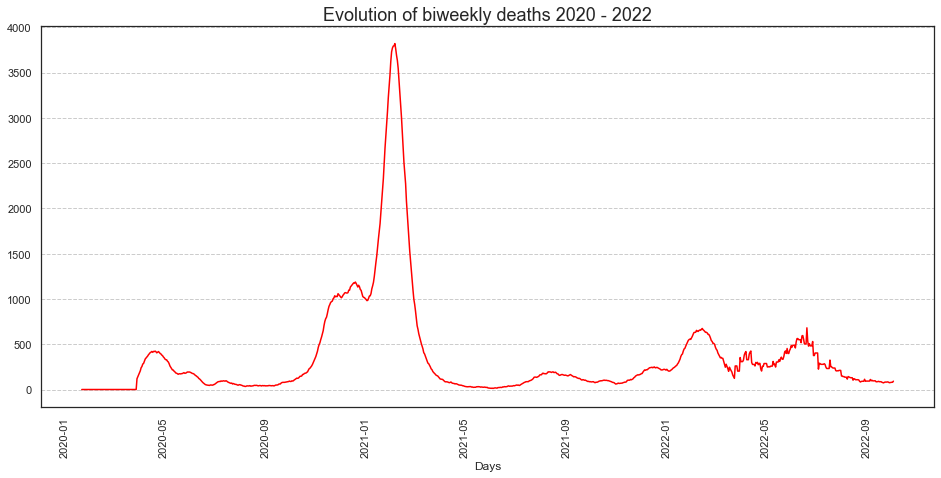

In [56]:
sns.set_context("notebook")
sns.set_style("white")
plt.figure(figsize=(16,7))
sns.lineplot(x = prt_biweekly_deaths.index,
             y = prt_biweekly_deaths.values,
             color = "red")

plt.xlabel("Days")
plt.title("Evolution of biweekly deaths 2020 - 2022", fontsize = 18)


plt.xticks(rotation=90)
plt.grid(axis="y",linestyle="--")
plt.show()

#### Biweekly change in confirmed covid - 19 deaths

In [57]:
prt_biweekly_deaths = pd.DataFrame(prt_biweekly_deaths)
prt_biweekly_deaths.rename(columns={"Portugal":"Biweekly_Deaths"}, inplace = True)
prt_biweekly_deaths

,Biweekly_Deaths
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2022-09-29,77.0
2022-09-30,80.0
2022-10-01,80.0


In [58]:
prt_biweekly_deaths["Percentage changes(%)"] = prt_biweekly_deaths["Biweekly_Deaths"].pct_change()

In [59]:
prt_biweekly_deaths["Percentage changes(%)"] = prt_biweekly_deaths["Percentage changes(%)"].fillna(0)

In [60]:
prt_biweekly_deaths.reset_index(inplace = True)

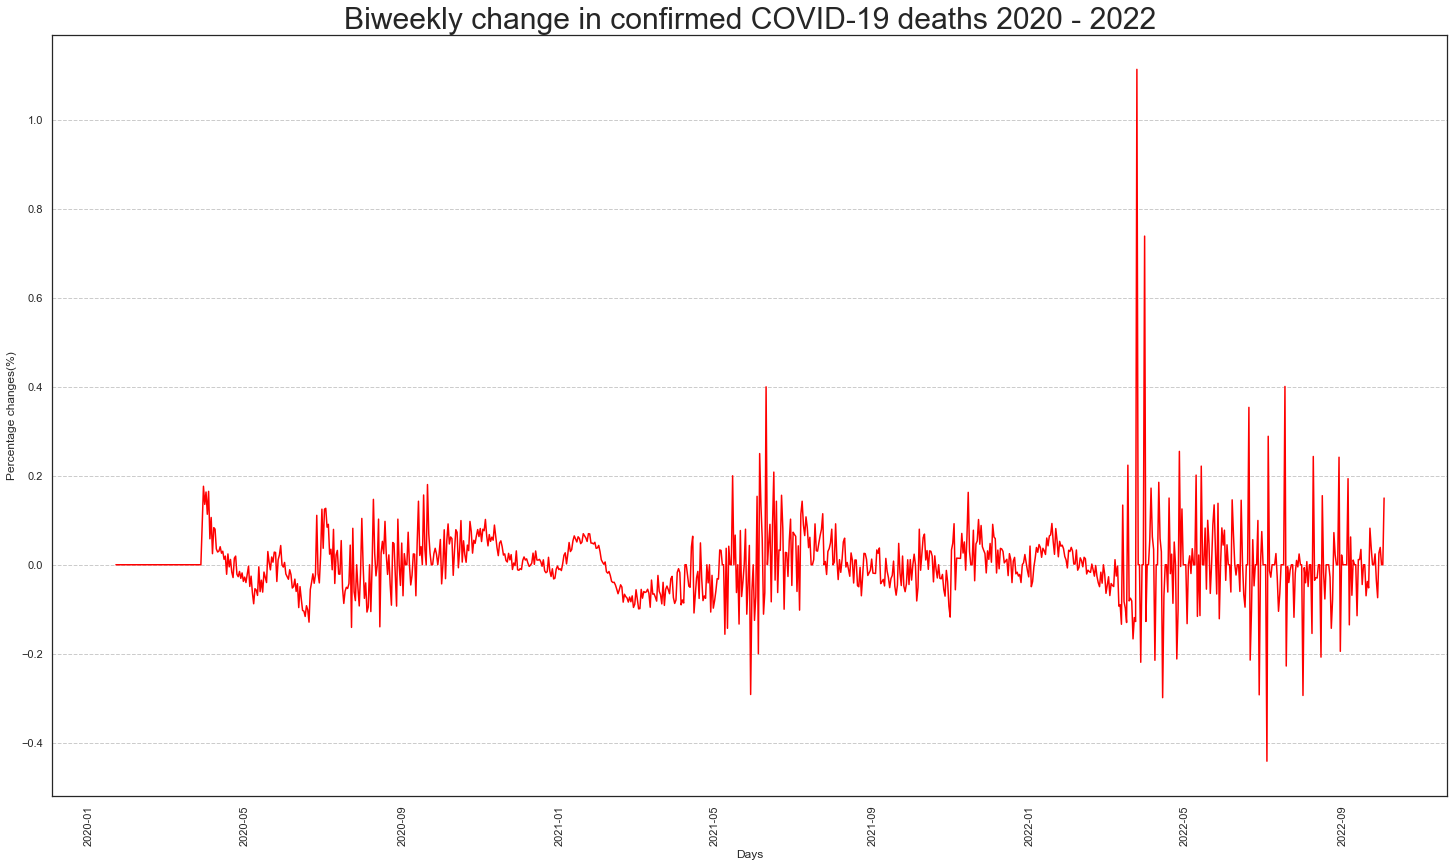

In [61]:
sns.set_context("notebook")
sns.set_style("white")
plt.figure(figsize=(25,14))
sns.lineplot(x = prt_biweekly_deaths.date,
             y = prt_biweekly_deaths["Percentage changes(%)"],
             color = "red")

plt.xlabel("Days")
plt.title("Biweekly change in confirmed COVID-19 deaths 2020 - 2022", fontsize = 30)

plt.xticks(rotation=90)
plt.grid(axis="y",linestyle="--")
plt.show()


In [62]:
prt_biweekly_deaths.tail()

,date,Biweekly_Deaths,Percentage changes(%)
981,2022-09-29,77.0,0.026667
982,2022-09-30,80.0,0.038961
983,2022-10-01,80.0,0.000000
984,2022-10-02,80.0,0.000000
985,2022-10-03,92.0,0.150000


## 3. Vaccinations

#### 3.1 How many COVID-19 vaccine doses are administered daily?
#### 3.2 How many COVID-19 vaccine doses have been administered in total?
#### 3.3 What share of the population has received at least one dose of the COVID-19 vaccine?
#### 3.4 What share of the population has completed the initial vaccination protocol?


#### 3.1 How many COVID-19 vaccine doses are administered daily?

In [63]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0,2020


In [64]:
vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [65]:
prt_vaccinations = vaccinations.loc[vaccinations.location == "Portugal"]

In [66]:
prt_vaccinations["Year"] = prt_vaccinations["date"].dt.year

/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/1932055478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt_vaccinations["Year"] = prt_vaccinations["date"].dt.year


In [67]:
prt_vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,Year
94762,Portugal,PRT,2021-01-01,5173.0,5167.0,4.0,NaN,NaN,NaN,0.05,0.05,0.0,NaN,NaN,NaN,NaN,2021
94763,Portugal,PRT,2021-01-02,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94764,Portugal,PRT,2021-01-03,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94765,Portugal,PRT,2021-01-04,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94766,Portugal,PRT,2021-01-05,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021


In [68]:
prt_vaccinations.loc[prt_vaccinations.date == "2021-12-31"]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,Year
95126,Portugal,PRT,2021-12-31,19923412.0,9375313.0,8568632.0,3106267.0,NaN,61082.0,193.62,91.11,83.27,30.19,5936.0,2027.0,0.02,2021


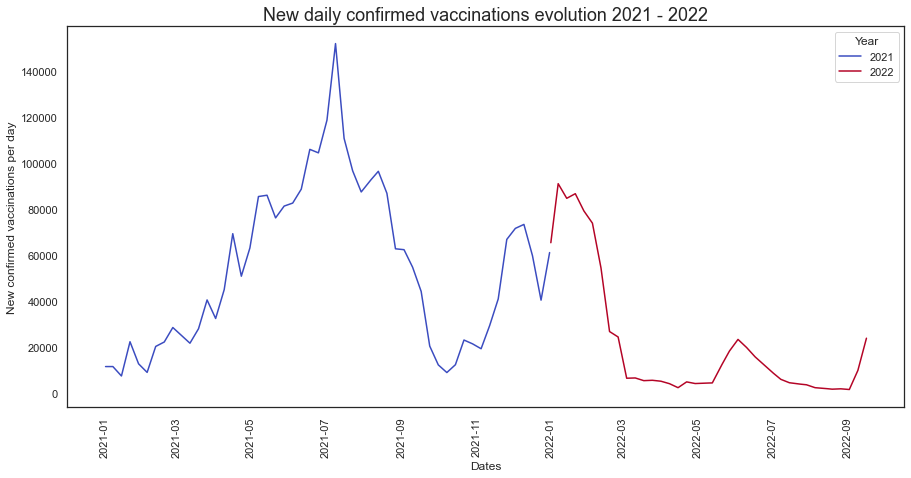

In [69]:
plt.figure(figsize=(15,7))


sns.lineplot(x = prt_vaccinations.date,
             y = prt_vaccinations.daily_vaccinations,
             palette = "coolwarm",
             hue = prt_vaccinations.Year)



plt.xticks(rotation="vertical")
plt.xlabel("Dates")
plt.ylabel("New confirmed vaccinations per day")
plt.title("New daily confirmed vaccinations evolution 2021 - 2022", fontsize=18)


plt.show()

#### 3.2 How many COVID-19 vaccine doses have been administered in total?

In [70]:
prt_vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,Year
94762,Portugal,PRT,2021-01-01,5173.0,5167.0,4.0,NaN,NaN,NaN,0.05,0.05,0.0,NaN,NaN,NaN,NaN,2021
94763,Portugal,PRT,2021-01-02,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94764,Portugal,PRT,2021-01-03,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94765,Portugal,PRT,2021-01-04,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94766,Portugal,PRT,2021-01-05,NaN,NaN,NaN,NaN,NaN,11507.0,NaN,NaN,NaN,NaN,1118.0,11483.0,0.112,2021


In [71]:
prt_vaccinations['total_vaccinations_per_hundred'] = prt_vaccinations['total_vaccinations_per_hundred'].interpolate()

/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/4293308720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt_vaccinations['total_vaccinations_per_hundred'] = prt_vaccinations['total_vaccinations_per_hundred'].interpolate()


In [72]:
prt_vaccinations.groupby("date")["total_vaccinations_per_hundred"].sum()

date
2021-01-01      0.050000
2021-01-02      0.161429
2021-01-03      0.272857
2021-01-04      0.384286
2021-01-05      0.495714
                 ...    
2022-09-12    243.378571
2022-09-13    243.611429
2022-09-14    243.844286
2022-09-15    244.077143
2022-09-16    244.310000
Name: total_vaccinations_per_hundred, Length: 624, dtype: float64

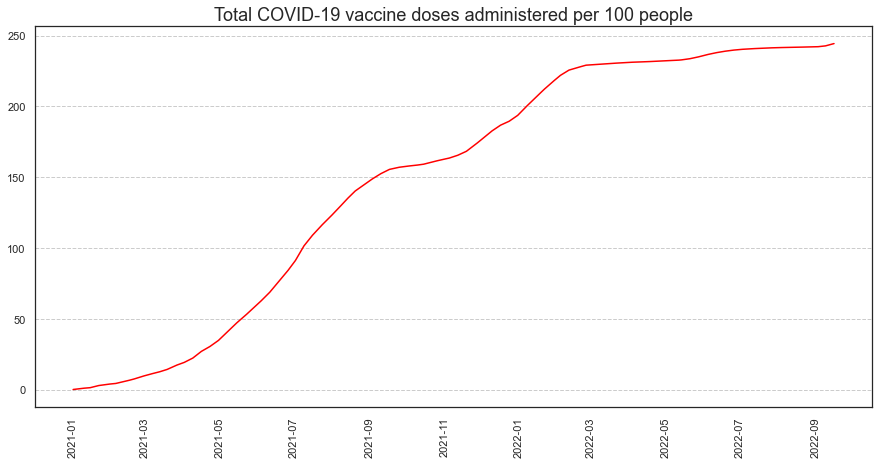

In [73]:
plt.figure(figsize=(15,7))

plt.plot(prt_vaccinations.groupby("date")["total_vaccinations_per_hundred"].sum().index.values,
         prt_vaccinations.groupby("date")["total_vaccinations_per_hundred"].sum().values, 
         color = "red")
plt.xticks(rotation=90)
plt.grid(axis="y",linestyle="--")

plt.title("Total COVID-19 vaccine doses administered per 100 people", fontsize=18)

plt.show()

#### 3.2 What share of the population has received at least one dose of the COVID-19 vaccine?

In [74]:
prt_vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,Year
94762,Portugal,PRT,2021-01-01,5173.0,5167.0,4.0,NaN,NaN,NaN,0.050000,0.05,0.0,NaN,NaN,NaN,NaN,2021
94763,Portugal,PRT,2021-01-02,NaN,NaN,NaN,NaN,NaN,11507.0,0.161429,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94764,Portugal,PRT,2021-01-03,NaN,NaN,NaN,NaN,NaN,11507.0,0.272857,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94765,Portugal,PRT,2021-01-04,NaN,NaN,NaN,NaN,NaN,11507.0,0.384286,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94766,Portugal,PRT,2021-01-05,NaN,NaN,NaN,NaN,NaN,11507.0,0.495714,NaN,NaN,NaN,1118.0,11483.0,0.112,2021


In [75]:
prt_population = prt.population.values[0]
prt_population

10290103.0

In [76]:
prt_vaccinations['people_vaccinated'] = prt_vaccinations['people_vaccinated'].interpolate()

/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/1166254726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt_vaccinations['people_vaccinated'] = prt_vaccinations['people_vaccinated'].interpolate()


In [77]:
prt_vaccinations.groupby("date")["people_vaccinated"].sum()

date
2021-01-01    5.167000e+03
2021-01-02    1.664957e+04
2021-01-03    2.813214e+04
2021-01-04    3.961471e+04
2021-01-05    5.109729e+04
                  ...     
2022-09-12    9.754249e+06
2022-09-13    9.754340e+06
2022-09-14    9.754431e+06
2022-09-15    9.754521e+06
2022-09-16    9.754612e+06
Name: people_vaccinated, Length: 624, dtype: float64

In [78]:
(prt_vaccinations.groupby("date")["people_vaccinated"].sum().values) / (prt_population) * 100

array([5.02132972e-02, 1.61801796e-01, 2.73390294e-01, 3.84978793e-01,
       4.96567291e-01, 6.08155790e-01, 7.19744288e-01, 8.31332786e-01,
       9.01559766e-01, 9.71786746e-01, 1.04201373e+00, 1.11224071e+00,
       1.18246769e+00, 1.25269467e+00, 1.32292165e+00, 1.49404308e+00,
       1.66516451e+00, 1.83628594e+00, 2.00740737e+00, 2.17852880e+00,
       2.34965023e+00, 2.52077166e+00, 2.58024350e+00, 2.63971535e+00,
       2.69918720e+00, 2.75865904e+00, 2.81813089e+00, 2.87760274e+00,
       2.93707459e+00, 2.97174174e+00, 3.00640889e+00, 3.04107604e+00,
       3.07574320e+00, 3.11041035e+00, 3.14507750e+00, 3.17974465e+00,
       3.23766716e+00, 3.29558967e+00, 3.35351218e+00, 3.41143468e+00,
       3.46935719e+00, 3.52727970e+00, 3.58520221e+00, 3.73021533e+00,
       3.87522846e+00, 4.02024159e+00, 4.16525471e+00, 4.31026784e+00,
       4.45528096e+00, 4.60029409e+00, 4.84770658e+00, 5.09511907e+00,
       5.34253156e+00, 5.58994405e+00, 5.83735654e+00, 6.08476903e+00,
      

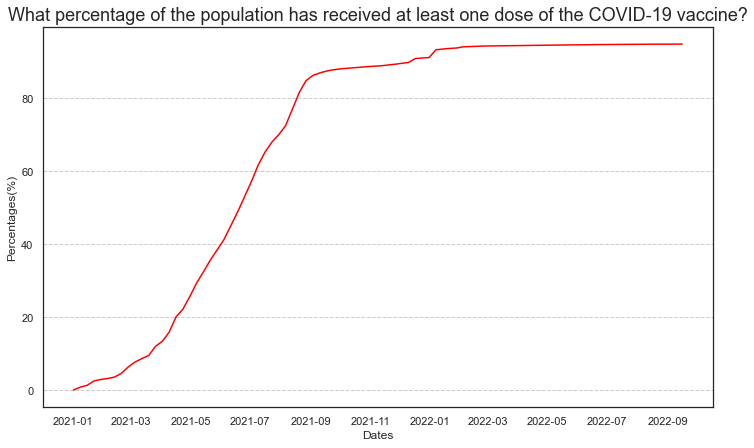

In [79]:
plt.figure(figsize=(12,7))
plt.plot(prt_vaccinations.groupby("date")["people_vaccinated"].sum().index.values,
        (prt_vaccinations.groupby("date")["people_vaccinated"].sum().values) / (prt_population) * 100,
         color = "red")



plt.grid(axis="y",linestyle="--")
plt.ylabel("Percentages(%)")
plt.xlabel("Dates")
plt.title("What percentage of the population has received at least one dose of the COVID-19 vaccine?", fontsize=18)


plt.show()

#### 3.4 What share of the population has completed the initial vaccination protocol?

In [80]:
prt_vaccinations["people_fully_vaccinated"].interpolate(inplace = True)

/Users/andrelourenco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [81]:
prt_vaccinations.groupby("date")["people_fully_vaccinated"].sum()

date
2021-01-01    4.000000e+00
2021-01-02    2.985714e+01
2021-01-03    5.571429e+01
2021-01-04    8.157143e+01
2021-01-05    1.074286e+02
                  ...     
2022-09-12    8.917617e+06
2022-09-13    8.917782e+06
2022-09-14    8.917948e+06
2022-09-15    8.918114e+06
2022-09-16    8.918280e+06
Name: people_fully_vaccinated, Length: 624, dtype: float64

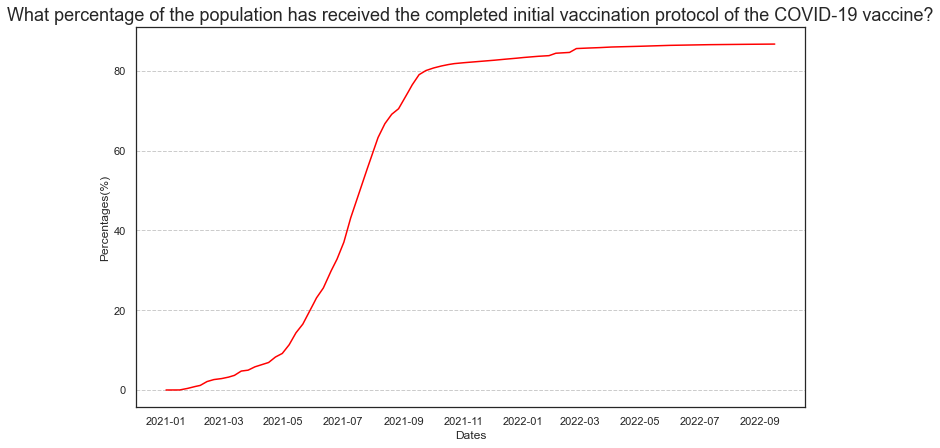

In [82]:
plt.figure(figsize=(12,7))
sns.lineplot(x = prt_vaccinations.groupby("date")["people_fully_vaccinated"].sum().index.values,
            y = (prt_vaccinations.groupby("date")["people_fully_vaccinated"].sum()) / (prt_population) * 100 ,
            color = "red")


plt.grid(axis="y",linestyle="--")
plt.ylabel("Percentages(%)")
plt.xlabel("Dates")
plt.title("What percentage of the population has received the completed initial vaccination protocol of the COVID-19 vaccine?", fontsize=18)


plt.show()

In [83]:
prt_vaccinations.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,Year
94762,Portugal,PRT,2021-01-01,5173.0,5167.000000,4.000000,NaN,NaN,NaN,0.050000,0.05,0.0,NaN,NaN,NaN,NaN,2021
94763,Portugal,PRT,2021-01-02,NaN,16649.571429,29.857143,NaN,NaN,11507.0,0.161429,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94764,Portugal,PRT,2021-01-03,NaN,28132.142857,55.714286,NaN,NaN,11507.0,0.272857,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94765,Portugal,PRT,2021-01-04,NaN,39614.714286,81.571429,NaN,NaN,11507.0,0.384286,NaN,NaN,NaN,1118.0,11483.0,0.112,2021
94766,Portugal,PRT,2021-01-05,NaN,51097.285714,107.428571,NaN,NaN,11507.0,0.495714,NaN,NaN,NaN,1118.0,11483.0,0.112,2021


## 4. Did vaccination Worked

#### 3.1 How is the vaccination process related to the confirmed cases?
   
#### 3.2 How is the vaccination process related to the affluence in hospitals?
  
#### 3.3 How is the vaccination process related to the confirmed deaths?
   


#### 3.1 How is the vaccination process related to the confirmed cases?

In [84]:
prt["total_vaccinations"].replace(0, np.nan, inplace=True)
prt["total_vaccinations_per_hundred"].replace(0, np.nan, inplace=True)

/Users/andrelourenco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [85]:
prt["total_vaccinations"] = prt["total_vaccinations"].interpolate()
prt["total_vaccinations_per_hundred"] = prt["total_vaccinations_per_hundred"].interpolate()

/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/1015406848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt["total_vaccinations"] = prt["total_vaccinations"].interpolate()
/var/folders/6h/zf15b3v920q2kw499ld4ws740000gn/T/ipykernel_2130/1015406848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prt["total_vaccinations_per_hundred"] = prt["total_vaccinations_per_hundred"].interpolate()


In [86]:
prt["total_vaccinations"].fillna(0, inplace = True)
prt["total_vaccinations_per_hundred"].fillna(0, inplace = True)

/Users/andrelourenco/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [87]:
prt.corr().loc[["new_cases"],["total_vaccinations","total_vaccinations_per_hundred"]]

,total_vaccinations,total_vaccinations_per_hundred
new_cases,0.420354,0.420354


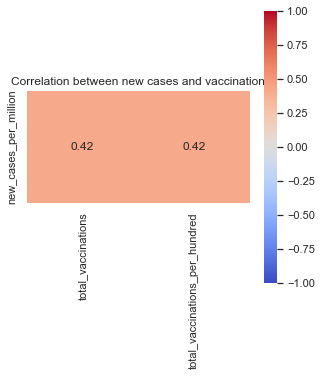

In [88]:
## Correlation between New_cases_per_million and total_vaccinations

plt.figure(figsize=(5,5))

sns.heatmap(prt.corr().loc[["new_cases_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]], 
            annot=True, vmax=1, vmin = -1, cmap = "coolwarm", square = True);

plt.title("Correlation between new cases and vaccination", fontsize = 12)


plt.show()

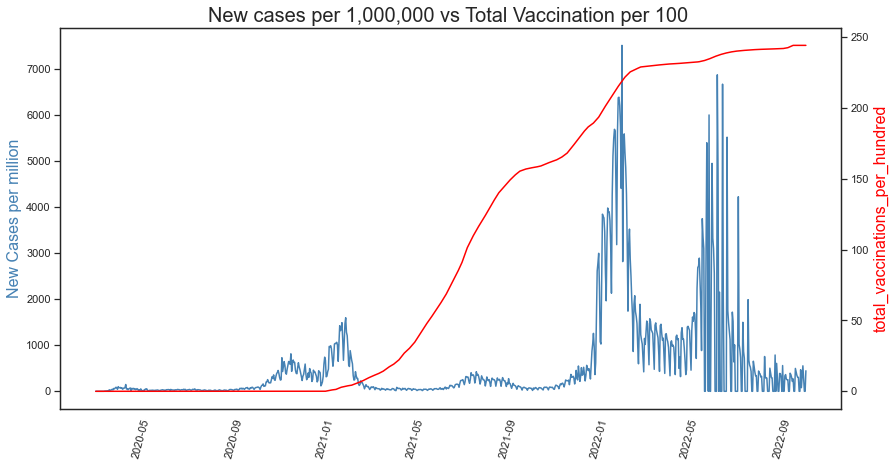

In [89]:
col1 = 'steelblue'
col2 = 'red'


fig,ax = plt.subplots(figsize=(14,7))



ax.plot(prt.date, prt.new_cases_per_million, color=col1)
plt.xticks(rotation=75)
ax.set_ylabel('New Cases per million', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

ax2.plot(prt.date, prt.total_vaccinations_per_hundred, color=col2)
ax2.set_ylabel('total_vaccinations_per_hundred', color=col2, fontsize=16)


plt.title("New cases per 1,000,000 vs Total Vaccination per 100 ", fontsize = 20)

plt.show()

### R: We can conclude that the relationship between new cases and vaccination is not large enough for the latter to result in a decrease in new cases.

#### 3.2 How is the vaccination process related to the affluence in hospitals?

In [90]:
prt.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
160405,PRT,Europe,Portugal,2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,-1943.6,-7.87,-8.18,-188.880519,2020
160406,PRT,Europe,Portugal,2020-03-02,2.0,2.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160407,PRT,Europe,Portugal,2020-03-03,2.0,0.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160408,PRT,Europe,Portugal,2020-03-04,5.0,3.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020
160409,PRT,Europe,Portugal,2020-03-05,8.0,3.0,0.0,0.0,0.0,0.0,...,30.0,0.0,3.39,82.05,0.864,0.0,0.00,0.00,0.000000,2020


In [91]:
prt.corr().loc[["hosp_patients_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]]

,total_vaccinations,total_vaccinations_per_hundred
hosp_patients_per_million,-0.332635,-0.332633


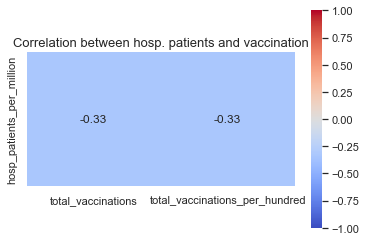

In [92]:
## Correlation between hosp_patients_per_million and total_vaccinations

sns.heatmap(prt.corr().loc[["hosp_patients_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]],
           annot=True, vmax=1, vmin = -1, cmap = "coolwarm", square = True);

plt.title("Correlation between hosp. patients and vaccination", fontsize = 13)

plt.show()

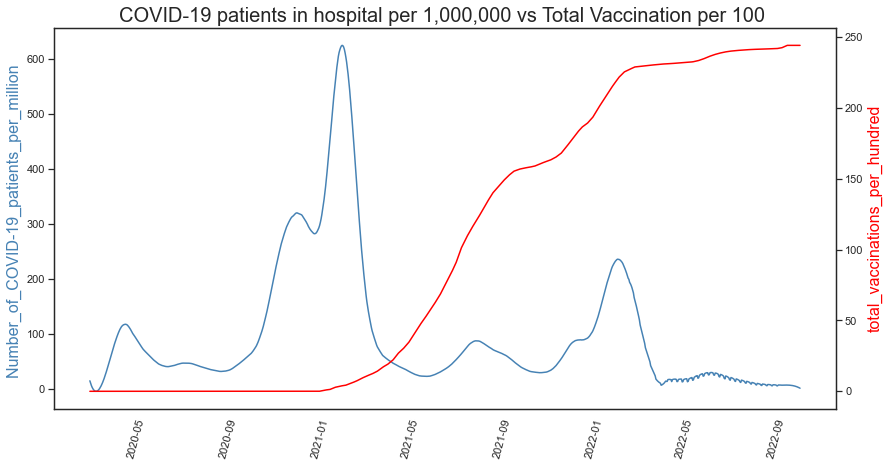

In [93]:
col1 = 'steelblue'
col2 = 'red'


fig,ax = plt.subplots(figsize=(14,7))

### smooth Graph
y_smooth = savgol_filter(prt.hosp_patients_per_million, 51, 3)

plt.plot(prt.date,y_smooth, color=col1)
plt.xticks(rotation=75)
ax.set_ylabel('Number_of_COVID-19_patients_per_million ', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
ax2.plot(prt.date, prt.total_vaccinations_per_hundred, color=col2)
ax2.set_ylabel('total_vaccinations_per_hundred', color=col2, fontsize=16)

### title
plt.title("COVID-19 patients in hospital per 1,000,000 vs Total Vaccination per 100 ", fontsize = 20)

plt.show()

### R: We can conclude that the more advanced the vaccination process, the smaller the number of people in hospitals due to covid 19

In [94]:
prt.corr().loc[["icu_patients_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]]

,total_vaccinations,total_vaccinations_per_hundred
icu_patients_per_million,-0.458637,-0.458636


Text(0.5, 1.0, 'Correlation between ICU patients and vaccination')

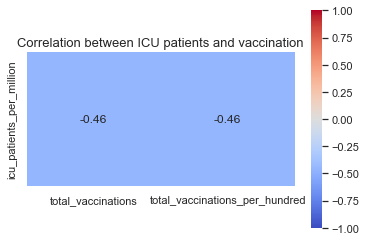

In [95]:
## Correlation between icu_patients_per_million and total_vaccinations

sns.heatmap(prt.corr().loc[["icu_patients_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]],
           annot = True,vmax=1, vmin = -1, cmap = "coolwarm", square = True);

plt.title("Correlation between ICU patients and vaccination", fontsize = 13)

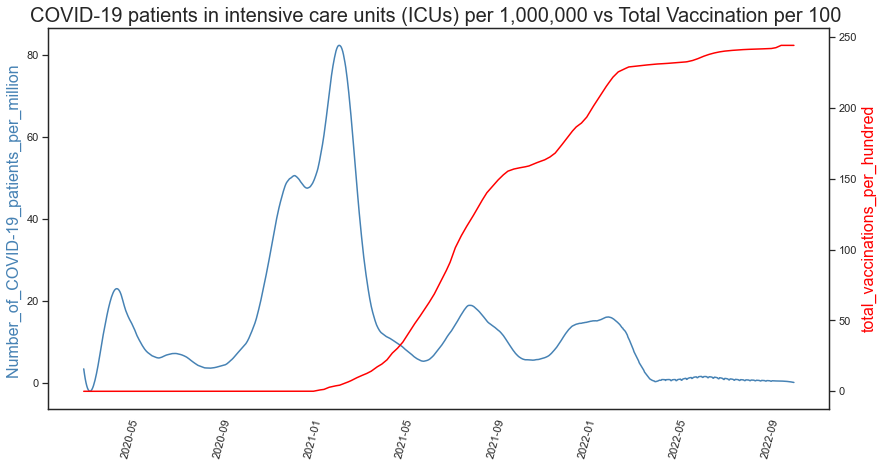

In [96]:
col1 = 'steelblue'
col2 = 'red'


fig,ax = plt.subplots(figsize=(14,7))

### smooth Graph
y_smooth = savgol_filter(prt.icu_patients_per_million, 51, 3)

ax.plot(prt.date,y_smooth, color=col1)
plt.xticks(rotation=75)
ax.set_ylabel('Number_of_COVID-19_patients_per_million ', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
ax2.plot(prt.date, prt.total_vaccinations_per_hundred, color=col2)
ax2.set_ylabel('total_vaccinations_per_hundred', color=col2, fontsize=16)

### title
plt.title("COVID-19 patients in intensive care units (ICUs) per 1,000,000 vs Total Vaccination per 100 ", fontsize = 20)

plt.show()

### R: We can conclude that vaccination presents itself as a more effective mean of combating the most serious cases concerning patients in intensive care(ICUs)

#### 3.3 How is the vaccination process related to the confirmed deaths?

In [97]:
prt.corr().loc[["new_deaths_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]]

,total_vaccinations,total_vaccinations_per_hundred
new_deaths_per_million,-0.189886,-0.189884


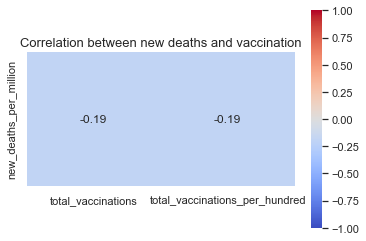

In [98]:
## Correlation between new_deaths_per_million and total_vaccinations


sns.heatmap(prt.corr().loc[["new_deaths_per_million"],["total_vaccinations","total_vaccinations_per_hundred"]],
           annot = True,vmax=1, vmin = -1, cmap = "coolwarm", square = True);

plt.title("Correlation between new deaths and vaccination", fontsize = 13)


plt.show()

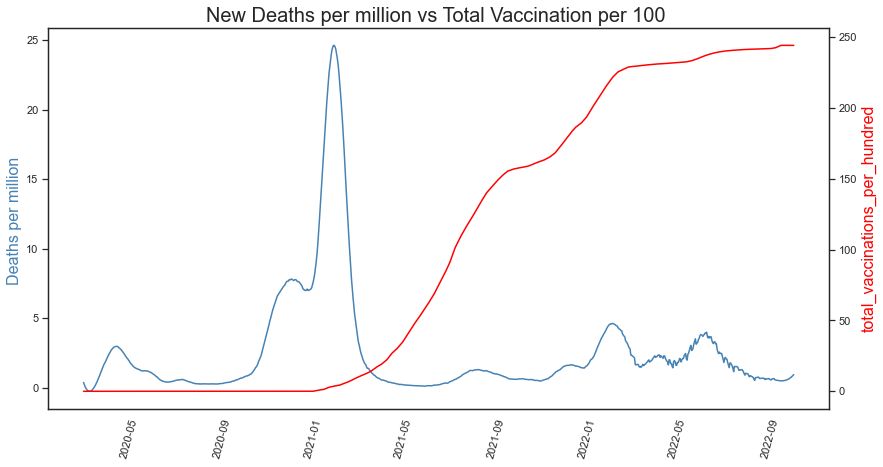

In [99]:
col1 = 'steelblue'
col2 = 'red'


fig,ax = plt.subplots(figsize=(14,7))

### smooth Graph
y_smooth = savgol_filter(prt.new_deaths_per_million, 51, 3)

ax.plot(prt.date,y_smooth, color=col1)
plt.xticks(rotation=75)
ax.set_ylabel('Deaths per million ', color=col1, fontsize=16)

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()
ax2.plot(prt.date, prt.total_vaccinations_per_hundred, color=col2)
ax2.set_ylabel('total_vaccinations_per_hundred', color=col2, fontsize=16)

### title
plt.title("New Deaths per million vs Total Vaccination per 100 ", fontsize = 20)

plt.show()

# Conclusion

<div style="text-align: justify">
Although this dataset does not have important information about the fight against covid. Whether or not the country was in confinement, if so, what was the degree of confinement and the rules. What was the temperature on different days, and whether the national health system was able to withstand the influx of people in hospitals.

###### Despite this, through the data analysis we were able to verify the impact that vaccination had on the control of the covid 19 pandemic in Portugal:

<div style="text-align: justify">
The Vaccine has not shown great effectiveness in combating the new numbers of daily cases, it had a truly positive impact in terms of combating the number of deaths and the number of patients hospitalized with serious cases. In the figure below it is possible to see that in the winter of 2019 - 2020 (2020 - 01), the number of cases was reduced but the number of deaths reached a national record. In the winter of 2021 - 2022 (2022 - 01) the number of cases reached an all-time national record but the number of deaths was very low, Which reflects a positive impact of vanication.

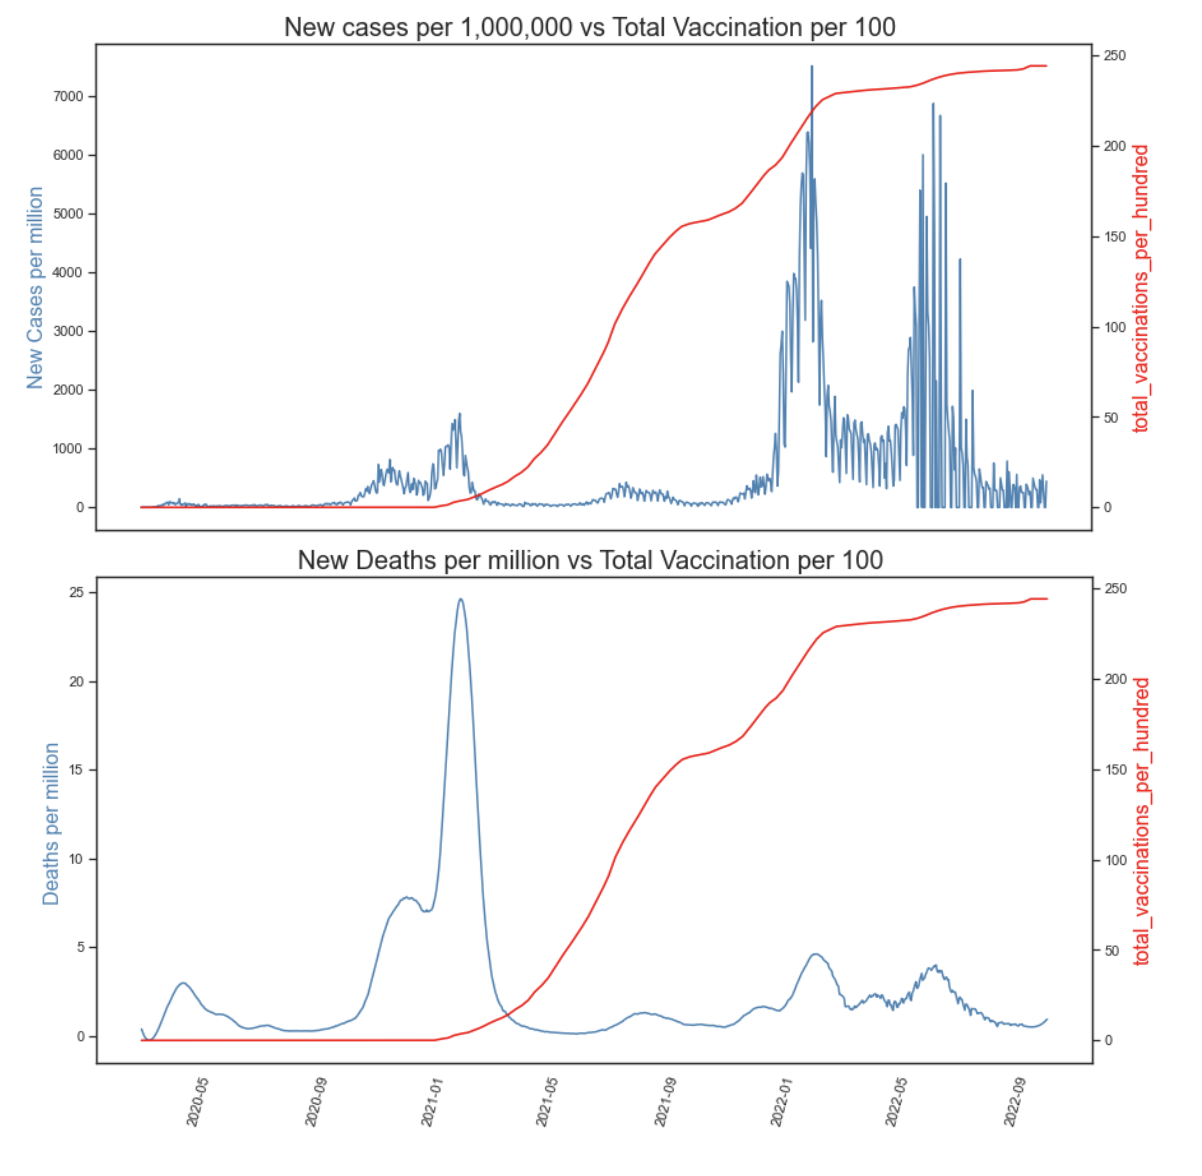